In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from statsmodels.stats.multicomp import MultiComparison
from sklearn.model_selection import train_test_split
from statsmodels.stats.anova import AnovaRM
from sklearn.datasets import load_diabetes
from sklearn.dummy import DummyRegressor
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import dataframe_image as dfi
import seaborn as sns
import pandas as pd
import numpy as np

In [123]:
diabetes = load_diabetes(as_frame=True, scaled=False)

In [124]:
x = diabetes['data']
y = diabetes['target']

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [126]:
x_train, y_train

(      age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 224  41.0  1.0  20.2   62.00  153.0   89.0  50.0  3.00  4.2485   89.0
 275  47.0  2.0  25.3   98.00  173.0  105.6  44.0  4.00  4.7622  108.0
 437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
 158  45.0  1.0  20.3   74.33  190.0  126.2  49.0  3.88  4.3041   79.0
 192  64.0  2.0  23.5   97.00  203.0  129.0  59.0  3.00  4.3175   77.0
 ..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
 147  33.0  1.0  35.0   89.00  200.0  130.4  42.0  4.76  4.9273  101.0
 408  66.0  1.0  21.7  126.00  212.0  127.8  45.0  4.71  5.2781  101.0
 382  62.0  1.0  32.0   88.00  172.0   69.0  38.0  4.00  5.7838  100.0
 236  56.0  1.0  27.0  105.00  247.0  160.6  54.0  5.00  5.0876   94.0
 217  69.0  1.0  29.3  124.00  223.0  139.0  54.0  4.00  5.0106  102.0
 
 [353 rows x 10 columns],
 224     77.0
 275     94.0
 437    178.0
 158     96.0
 192     91.0
        ...  
 147    128.0
 408    189.0
 382    

In [127]:
x_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,48.702550,1.464589,26.443059,94.845071,189.685552,116.046459,49.691218,4.091360,4.650808,91.036827
std,12.931174,0.499452,4.437202,13.785792,35.535917,31.007750,12.932445,1.277652,0.513401,11.249056
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,39.000000,1.000000,23.400000,84.000000,164.000000,96.600000,40.000000,3.000000,4.304100,84.000000
50%,50.000000,1.000000,25.700000,93.000000,187.000000,113.600000,48.000000,4.000000,4.634700,91.000000
75%,58.000000,2.000000,29.300000,105.000000,211.000000,135.800000,58.000000,5.000000,5.010600,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [128]:
y_train.describe()

count    353.000000
mean     152.314448
std       76.714866
min       25.000000
25%       87.000000
50%      141.000000
75%      214.000000
max      346.000000
Name: target, dtype: float64

In [129]:
data.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [130]:
def get_regressors():
    c1 = DummyRegressor(strategy='mean')
    c2 = DummyRegressor(strategy='median')
    c3 = DummyRegressor(strategy='quantile', quantile=0.5)
    c4 = DummyRegressor(strategy='constant', constant=0.1)
    return [c1, c2, c3, c4]

c1, c2, c3, c4 = get_classifiers()

In [131]:
def regression_metrics(y_true, y_pred):

    # media da diferença absoluta entre os valores reais e os valores previstos
    # quanto mais próximo de 0 melhor
    mae = mean_absolute_error(y_true, y_pred)

    # media da diferença quadrática entre os valores reais e os valores previstos
    # quanto mais próximo de 0 melhor
    mse = mean_squared_error(y_true, y_pred, squared=True)

    # raiz quadrada da media da diferença quadrática entre os valores reais e os valores previstos
    # quanto mais próximo de 0 melhor
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    # percentual de variação dos valores reais que podem ser explicados pelo modelo
    # quanto mais próximo de 1 melhor
    r2 = r2_score(y_true,y_pred)

    print("2) The Mean Absolute Error of model is:", np.round(mae, 2))
    print("3) The Mean Squared Error of model is:", np.round(mse, 2))
    print("4) The Root Mean Squared Error of model is:", np.round(rmse, 2))
    print("5) The R-Square score of the model is " , np.round(r2, 2))

In [132]:
r1, r2, r3, r4 = get_regressors()
kfold = KFold(n_splits=10, shuffle=True)
results = []

In [149]:
c1.fit(x_train, y_train)
c1.score(x_test, y_test)
y_pred = c1.predict(x_test)

regression_metrics(y_test, y_pred)

2) The Mean Absolute Error of model is: 65.32
3) The Mean Squared Error of model is: 6173.52
4) The Root Mean Squared Error of model is: 78.57
5) The R-Square score of the model is  -0.0


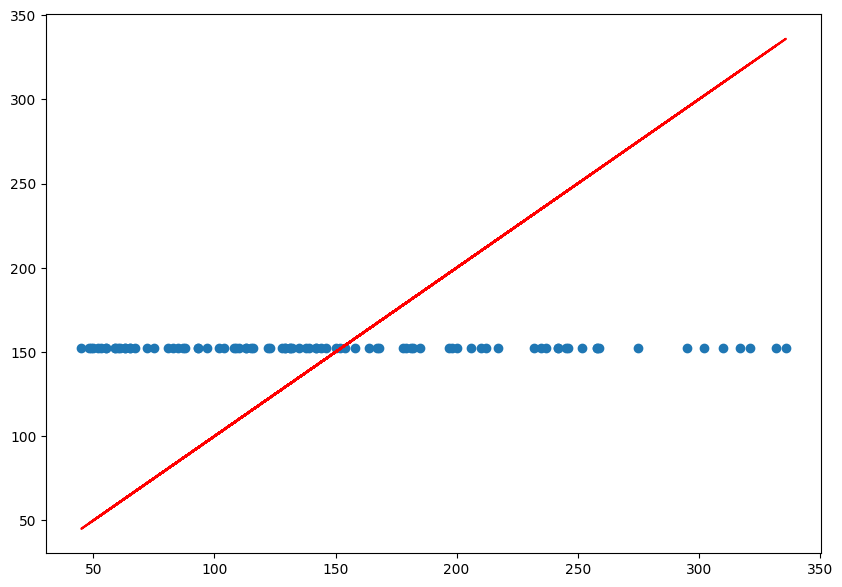

In [150]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#plt.savefig('diabetes.png')

In [151]:
c2.fit(x_train, y_train)
c2.score(x_test, y_test)
y_pred = c2.predict(x_test)

regression_metrics(y_test, y_pred)

2) The Mean Absolute Error of model is: 65.32
3) The Mean Squared Error of model is: 6173.52
4) The Root Mean Squared Error of model is: 78.57
5) The R-Square score of the model is  -0.0


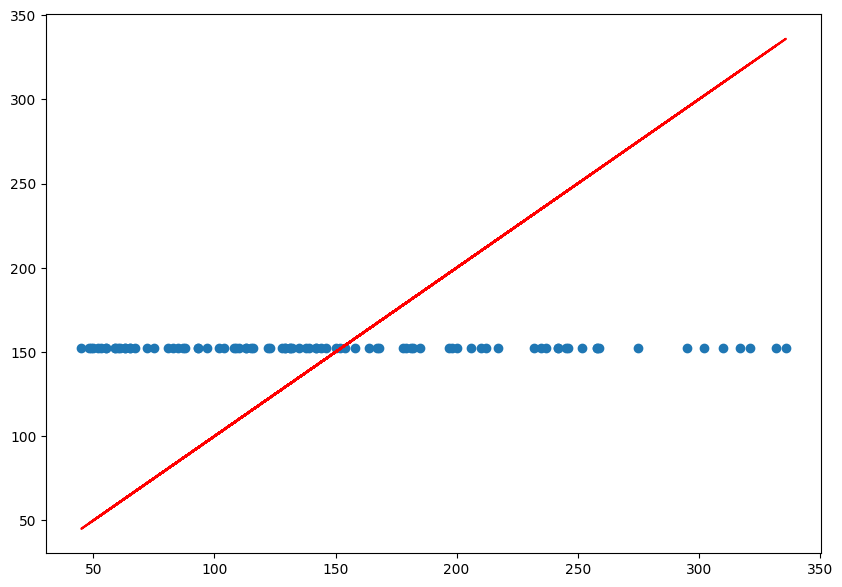

In [152]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#plt.savefig('median.png')

In [153]:
c3.fit(x_train, y_train)
c3.score(x_test, y_test)
y_pred = c3.predict(x_test)

regression_metrics(y_test, y_pred)

2) The Mean Absolute Error of model is: 65.32
3) The Mean Squared Error of model is: 6173.52
4) The Root Mean Squared Error of model is: 78.57
5) The R-Square score of the model is  -0.0


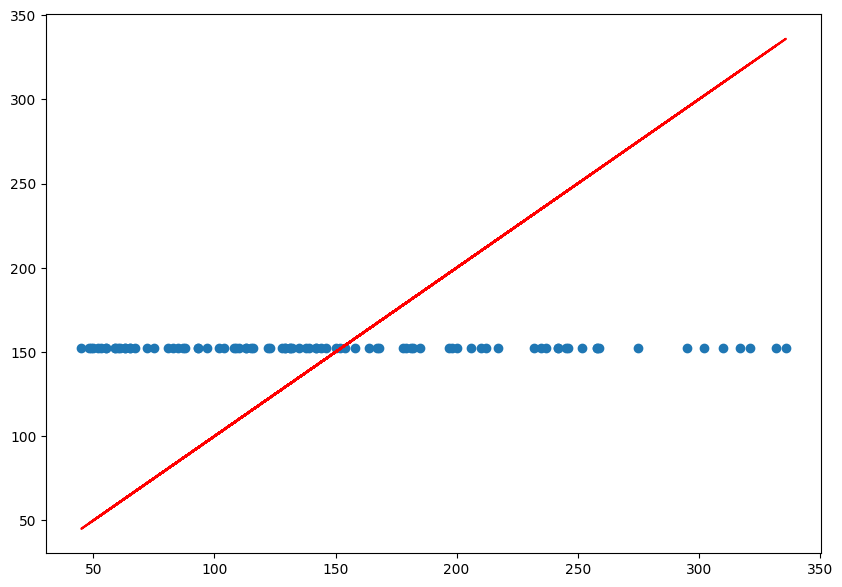

In [154]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#plt.savefig('quantile.png')

In [155]:
c4.fit(x_train, y_train)
c4.score(x_test, y_test)
y_pred = c4.predict(x_test)

regression_metrics(y_test, y_pred)

2) The Mean Absolute Error of model is: 151.32
3) The Mean Squared Error of model is: 29069.17
4) The Root Mean Squared Error of model is: 170.5
5) The R-Square score of the model is  -3.71


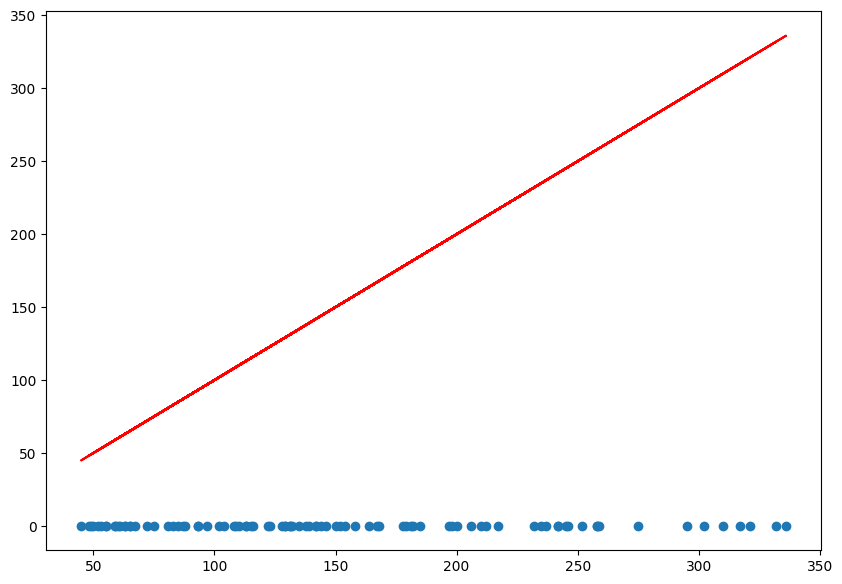

In [156]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#plt.savefig('constant.png')

In [133]:
result_r1 = cross_val_score(r1, x_train, y_train, cv=kfold);
for i, score in enumerate(result_r1):
    results.append({
        'model': 'mean',
        'fold': i,
        'r2': score
    })

In [134]:
result_r2 = cross_val_score(r2, x_train, y_train, cv=kfold);
for i, score in enumerate(result_r2):
    results.append({
        'model': 'median',
        'fold': i,
        'r2': score
    })

In [135]:
result_r3 = cross_val_score(r3, x_train, y_train, cv=kfold);
for i, score in enumerate(result_r3):
    results.append({
        'model': 'quantile',
        'fold': i,
        'r2': score
    })

In [136]:
result_r4 = cross_val_score(r4, x_train, y_train, cv=kfold);
for i, score in enumerate(result_r4):
    results.append({
        'model': 'constant',
        'fold': i,
        'r2': score
    })

In [147]:
df_results = pd.DataFrame(results)
df_results.head()

,model,fold,r2
0,mean,0,-0.009321
1,mean,1,-0.005125
2,mean,2,-0.010947
3,mean,3,-0.008291
4,mean,4,-0.044975


<Axes: >

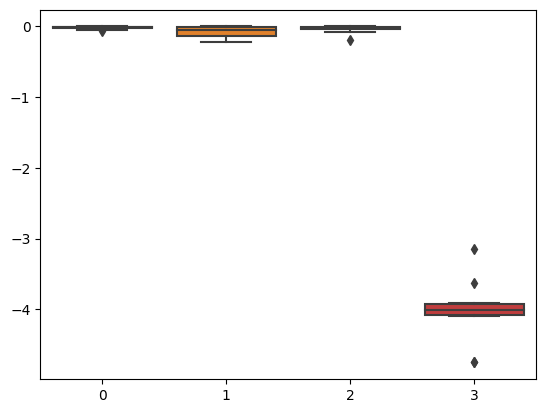

In [165]:
sns.boxplot(data=[df_results[df_results['model'] == 'mean']['r2'],
df_results[df_results['model'] == 'median']['r2'],
df_results[df_results['model'] == 'quantile']['r2'],
df_results[df_results['model'] == 'constant']['r2']])

In [139]:
anova = AnovaRM(data=df_results, depvar='r2', subject='model', within=['fold']).fit()
anova.summary()

,F Value,Num DF,Den DF,Pr > F
fold,1.3625,9.0000,27.0000,0.2531


In [163]:
multi_comp = MultiComparison(df_results["r2"], df_results["model"])
bonferroni_results = multi_comp.allpairtest(ttest_rel, method="bonferroni")
print(bonferroni_results[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=bonferroni
alphacSidak=0.01, alphacBonf=0.008
 group1   group2    stat    pval  pval_corr reject
--------------------------------------------------
constant     mean -27.3412    0.0       0.0   True
constant   median -27.9119    0.0       0.0   True
constant quantile -27.9012    0.0       0.0   True
    mean   median   2.4973  0.034    0.2041  False
    mean quantile   1.2947 0.2276       1.0  False
  median quantile  -1.5472 0.1562    0.9373  False
--------------------------------------------------
